# Chapter 3: Moving One note, or Many Notes: Two Categories of Modulation

___

Quick review: here is a major scale, given as the least-entropic sequence in the circle of fifths.

The major scale separates 12 bits into 2 strictly definable areas.

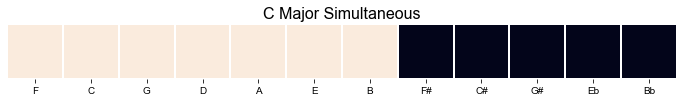

In [2]:
import numpy as np
import pt_utils
import pt_musicutils
import pt_naming_conventions
import pt_keypattern
import pt_analyzeaudio

import IPython.display as ipd
import jupyter_pt_tools as jpt_pt

c_major = 0b111111100000
jpt_pt.notegroup_heatmap(c_major, title="C Major Simultaneous")
ipd.Audio(jpt_pt.notegroup_wavepile(c_major), rate=44100)

Seven-note chords are at the limit for our understanding simultaneous sounds. So here is the same scale as a sequence:

In [3]:
ipd.Audio(jpt_pt.notegroup_wavestep(c_major), rate=4000)

# Navigating the Circle of Fifths

We have seen that in this scheme, a change of key can be accomplished with a simple bit shift.

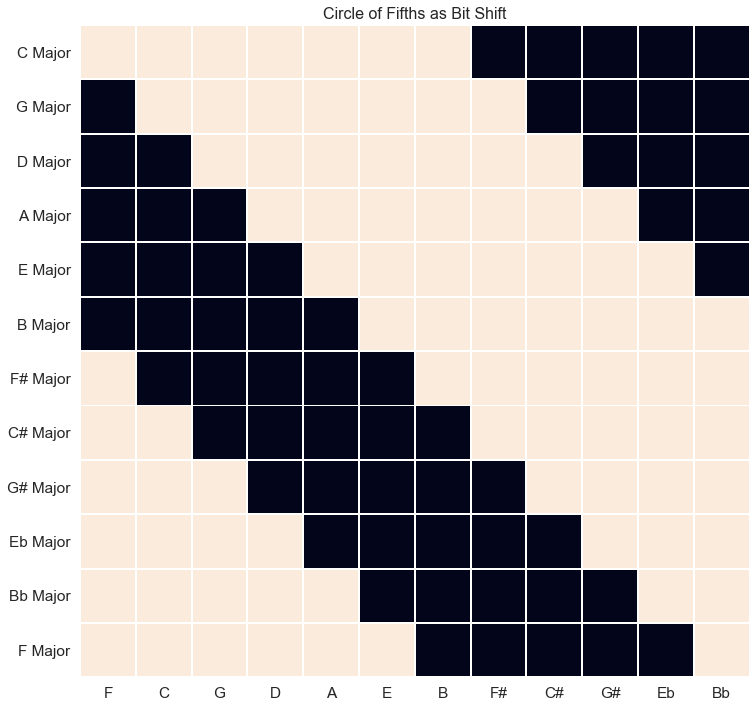

In [4]:
modulation = np.array([pt_utils.rotate_bits_right(0b111111100000, i) for i in range(12)])
yticks = [pt_naming_conventions.circle_fifth_notes(k=0)[(i+1)%12] + " Major" for i in range(12)]
jpt_pt.multiple_notegroup_heatmap(modulation, yticks=yticks, title="Circle of Fifths as Bit Shift")

kpdve_modulation = [[i, 0, 1, 0, 0] for i in range(12)]
# kpdve_modulation.reverse() #uncomment this line to hear a descending sequence (reads bottom to top)
patterns = [mode + disp for mode, disp in [pt_musicutils.get_tonic_mode_disp_tuple(kpdve) for kpdve in kpdve_modulation]]
sequence = jpt_pt.link_ordered_wavestep_sequences(patterns, duration=10)
ipd.Audio(sequence, rate=44100)

# Navigating Minor and related keys

In the model above, which moves from key to key, each consecutive modulation can be seen either as:

1. moving all the bits to the right one space or
2. moving one bit to the right seven spaces.

Both are effective for moving to a neighboring major key.

However, if we move one bit at a time for a few steps *consecutively* we get a curious result: all of the related keys (melodic minor, harmonic minor) show up. It's unsurprising in retrospect, but still seems to hold 

This forms the basis for the flexibility of a system to be further explored in the next chapters, known by five parameters: KPDVE (Key, Pattern, Degree, Voicing, Extensions)

The P parameter not only allows for flexibility of modes: it protects long-term orientation in the analysis and hearing of tonal music.

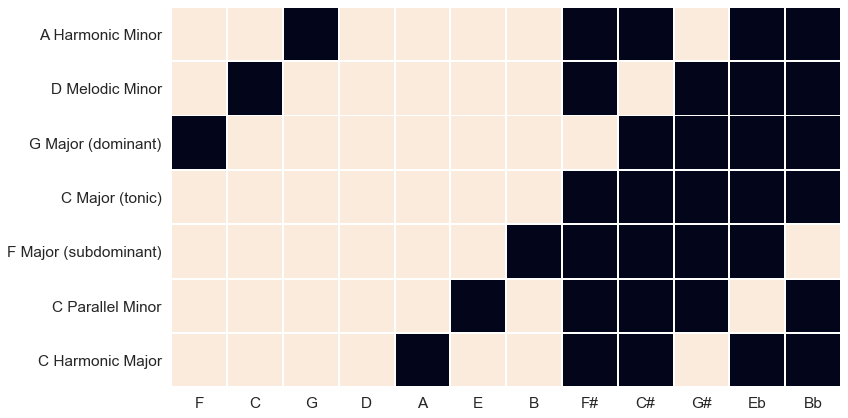

In [7]:
key = 0
temp_mode_order = [(i + 4)%7 for i in range(7)]
temp_mode_order.reverse()
modes = [pt_keypattern.get_binary_KP(key, i) for i in temp_mode_order]
kpdve_patterns = [[key, i, 0, 0, 0] for i in temp_mode_order]
tonics = [pt_naming_conventions.conv_tonic_name_for_kpdve(kpdve_patterns[i]) for i in temp_mode_order]
yticks = [tonics[i] + " " + pt_naming_conventions.PATTERN_CONVENTIONAL_NAMES[i] for i in temp_mode_order]
jpt_pt.multiple_notegroup_heatmap(modes, yticks=yticks)

patterns = [mode + disp for mode, disp in [pt_musicutils.get_tonic_mode_disp_tuple(kpdve) for kpdve in kpdve_patterns]]
sequence = jpt_pt.link_ordered_wavestep_sequences(patterns, duration=10)
ipd.Audio(sequence, rate=44100)

This is a very powerful set of patterns, yielding a huge amount of meaningful and colorful chords. It shows how changes in major/minor tone centers can be seen as shadows of full modulations, and implies how they might substitute for one another.

# "Practical" application...

Keys are not just theoretical categories. They are areas for both memory and prediction: things happen inside of them.

In the next chapter we shall see why this is so powerful, finding infinite chord patterns - and their harmonic functions - in the seven-tone scale.

We will see how that seven tone scale can function as an identity matrix for virtually any harmonic analysis on a binary device.

In the meantime, here is a blues progression, which can be freely filtered based on K and P categories.

In [2]:
import harmony_state
h = harmony_state.harmony_state()
dur = 8

h.current_dominant()
one_dom = h.current_kpdve
h.param_increment(0, -1)
four_dom = h.current_kpdve
h.param_increment(0, 2)
five_dom = h.current_kpdve

blues = [one_dom] * 4
blues += [four_dom]* 2
blues += [one_dom]* 2
blues += [five_dom, four_dom]
blues += [one_dom] * 2

In [3]:
k = 0 # change key 0-11
p = 0 # change pattern 0-7 (e.g. 3 gives minor)

blues_kpdve = blues
blues_kpdve = pt_utils.kpdve_add(np.array([k, p, p, 0, 0]), blues_kpdve) # using p in the d position preserves dominant quality (more about this later)
bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in blues_kpdve]
jpt_pt.multiple_notegroup_heatmap(bin_seq)
sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur)
sequence += jpt_pt.link_wavestep_sequences(bin_seq, duration=dur)
bin_seq = [pt_musicutils.circle_root_note_for_KPDVE(a_kpdve) for a_kpdve in blues_kpdve]
sequence += jpt_pt.link_wavepile_sequences(bin_seq, duration=dur, from_middle_c=-1)
bin_seq = [pt_keypattern.get_binary_KP(a_kpdve[0], a_kpdve[1]) for a_kpdve in blues_kpdve]
sequence += jpt_pt.link_wavestep_sequences(bin_seq, duration=dur, from_middle_c=1)
filename = "blues.wav"

jpt_pt.norm_wave_write(sequence, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.6, key_orientation=blues_kpdve[-1])
ipd.Audio(filename)

NameError: name 'pt_utils' is not defined